# tedana: TE Dependent ANAlysis
## Process five-echo flashing checkerboard dataset for software demo

**Author**: Daniel Handwerker & Monika Doerig


### Citation:


   
#### Tools included in this workflow
- **tedana**: The tedana Community, Ahmed, Z., Bandettini, P. A., Bottenhorn, K. L., Caballero-Gaudes, C., Dowdle, L. T., DuPre, E., Gonzalez-Castillo, J., Handwerker, D., Heunis, S., Kundu, P., Laird, A. R., Markello, R., Markiewicz, C. J., Maullin-Sapey, T., Moia, S., Molfese, P., Salo, T., Staden, I., … Whitaker, K. (2025). ME-ICA/tedana: 25.0.1 (25.0.1). Zenodo. [https://doi.org/10.5281/zenodo.15610868](https://doi.org/10.5281/zenodo.15610868)


#### Publications
- DuPre, E. M., Salo, T., Ahmed, Z., Bandettini, P. A., Bottenhorn, K. L., Caballero-Gaudes, C., Dowdle, L. T., Gonzalez-Castillo, J., Heunis, S., Kundu, P., Laird, A. R., Markello, R., Markiewicz, C. J., Moia, S., Staden, I., Teves, J. B., Uruñuela, E., Vaziri-Pashkam, M., Whitaker, K., & Handwerker, D. A. (2021). [TE-dependent analysis of multi-echo fMRI with tedana](https://joss.theoj.org/papers/10.21105/joss.03669). Journal of Open Source Software, 6(66), 3669. doi:10.21105/joss.03669.

- Kundu, P., Inati, S. J., Evans, J. W., Luh, W. M., & Bandettini, P. A. (2011). [Differentiating BOLD and non-BOLD signals in fMRI time series using multi-echo EPI](https://www.sciencedirect.com/science/article/abs/pii/S1053811911014303?via%3Dihub). NeuroImage, 60, 1759-1770.

- Kundu, P., Brenowitz, N. D., Voon, V., Worbe, Y., Vértes, P. E., Inati, S. J., Saad, Z. S., Bandettini, P. A., & Bullmore, E. T. (2013). [Integrated strategy for improving functional connectivity mapping using multiecho fMRI.](https://www.pnas.org/doi/full/10.1073/pnas.1301725110) Proceedings of the National Academy of Sciences, 110, 16187-16192.

#### Educational resources
- [tedana documentation](https://tedana.readthedocs.io/en/stable/index.html#)

#### Dataset
- DuPre, E., Salo, T., Whitaker, K. J., Teves, J., Dowdle, L., Reynolds, R. C., & Handwerker, D. A. (2024, February 21). tedana data. Retrieved from [osf.io/bpe8h](https://osf.io/bpe8h/)

In [ ]:
%%capture
! pip install tedana==25.0.1

In [5]:
import module
await module.load('afni/24.3.00')
await module.list()

['afni/24.3.00']

In [6]:
%matplotlib inline
import os
import os.path as op
from glob import glob
import webbrowser

from tedana.workflows import tedana_workflow

## Download 5 echo data

In [7]:
%%time
dset_dir5 = 'five-echo-dataset/'
wd = os.getcwd()

if not op.isdir(dset_dir5):
    os.mkdir(dset_dir5)

!curl -L -o five_echo_NIH.tar.xz https://osf.io/ea5v3/download
!tar xf five_echo_NIH.tar.xz -C five-echo-dataset
os.remove('five_echo_NIH.tar.xz')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   439  100   439    0     0    997      0 --:--:-- --:--:-- --:--:--  1000
100 68.5M  100 68.5M    0     0  13.1M      0  0:00:05  0:00:05 --:--:-- 16.5M
CPU times: user 159 ms, sys: 560 ms, total: 719 ms
Wall time: 8.61 s


In [22]:
# Clone GitHub repo and copy files
!git clone https://github.com/ME-ICA/ohbm-2025-multiecho.git temp_repo
!cp -r temp_repo/five-echo-dataset/* five-echo-dataset/
!rm -rf temp_repo

Cloning into 'temp_repo'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 150 (delta 40), reused 137 (delta 30), pack-reused 0 (from 0)
Receiving objects: 100% (150/150), 16.37 MiB | 40.88 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## Run workflow on 5 echo data

INFO     tedana:tedana_workflow:608 Using output directory: /home/jovyan/Git_repositories/five-echo-dataset/tedana_processed
INFO     tedana:tedana_workflow:627 Initializing and validating component selection tree
WARNING  component_selector:validate_tree:146 Decision tree includes fields that are not used or logged ['_comment']
INFO     component_selector:__init__:333 Performing component selection with minimal_decision_tree
INFO     component_selector:__init__:334 first version of minimal decision tree
INFO     tedana:tedana_workflow:630 Loading input data: ['five-echo-dataset/p06.SBJ01_S09_Task11_e1.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e2.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e3.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e4.sm.nii.gz', 'five-echo-dataset/p06.SBJ01_S09_Task11_e5.sm.nii.gz']
INFO     io:__init__:156 Generating figures directory: /home/jovyan/Git_repositories/five-echo-dataset/tedana_processed/figures
WARNING  tedana:tedana_workflo

Setting clustering defaults: {'min_samples': 15}
Running FastICA multiple times...


100%|██████████| 30/30 [02:47<00:00,  5.59s/it]


Inferring sign of components...
Clustering...
Computing centroids...


INFO     ica:r_ica:204 For RobustICA, FastICA did not converge in 3 of 30 interations.


Computing Silhouettes...
Computing Iq...


INFO     ica:r_ica:225 The DBSCAN clustering algorithm was used for clustering components across different runs
INFO     ica:r_ica:243 RobustICA with 30 robust runs and seed 42 was used. 39 components identified. The mean Index Quality is 0.9487300079521724.
INFO     ica:r_ica:251 The DBSCAN clustering algorithm detected outliers when clustering components for different runs. These outliers are excluded when calculating the index quality and the mixing matrix to maximise the robustness of the decomposition.
/home/jovyan/conda-environments/tedenv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
INFO     collect:generate_metrics:161 Calculating weight maps
INFO     collect:generate_metrics:173 Calculating parameter estimate maps for optimally combined data
INFO     collect:generate_metrics:193 Calculating z-statistic maps
INFO     collect:generate_metrics:203 Calcula

CPU times: user 1h 40min 54s, sys: 20.8 s, total: 1h 41min 14s
Wall time: 6min 45s


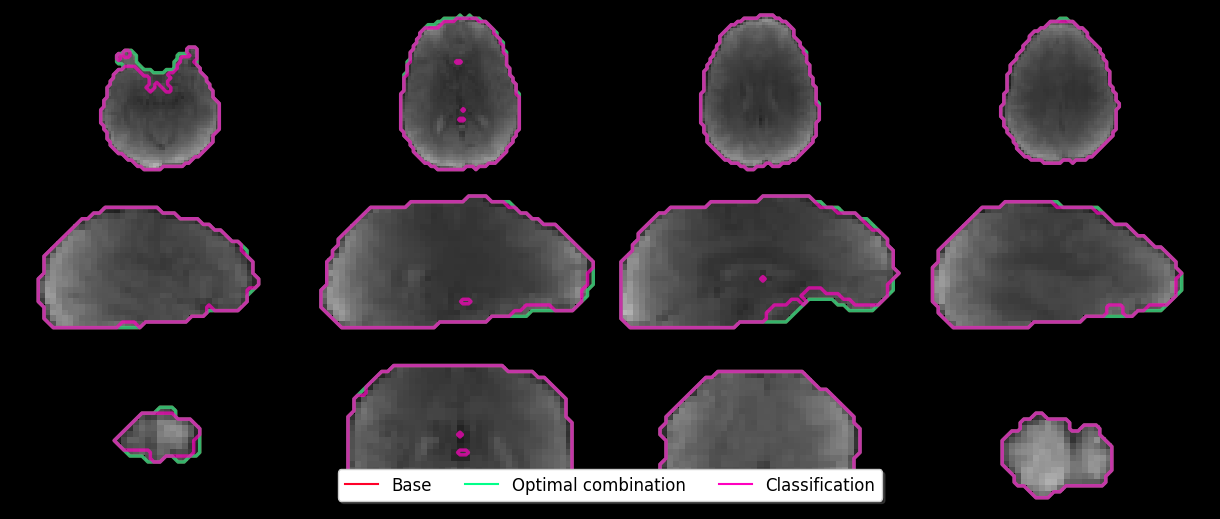

In [ ]:
%%time
dset_dir5_out = f"{dset_dir5}tedana_processed"
files = sorted(glob(op.join(dset_dir5, 'p06*.nii.gz')))
tes = [15.4, 29.7, 44.0, 58.3, 72.6]
tedana_workflow(files, tes, 
    tree="minimal",
    fixed_seed=42,
    ica_method="robustica",
    n_robust_runs=30,
    tedpca=53,
    out_dir=dset_dir5_out,
    tedort=False
    )

## Tedana report of 5 echo data

You can explore an example of an interactive tedana report [here](https://me-ica.github.io/ohbm-2023-multiecho/tedana/tedana_results_minimal_five-echo/tedana_report.html).

The tedana report for the current dataset was generated at the following location:

In [70]:
# this is the path of the tedana report
url = str(os.path.abspath(dset_dir5_out + '/tedana_report.html'))
print(url)

/home/jovyan/Git_repositories/five-echo-dataset/tedana_processed/tedana_report.html


To properly view the interactive *tedana html report* with all figures displayed correctly, right-click the file at the path shown above and select **Open in New Browser Tab**.

Below, selected components from the generated tedana report are visualized.

### Carpet plot

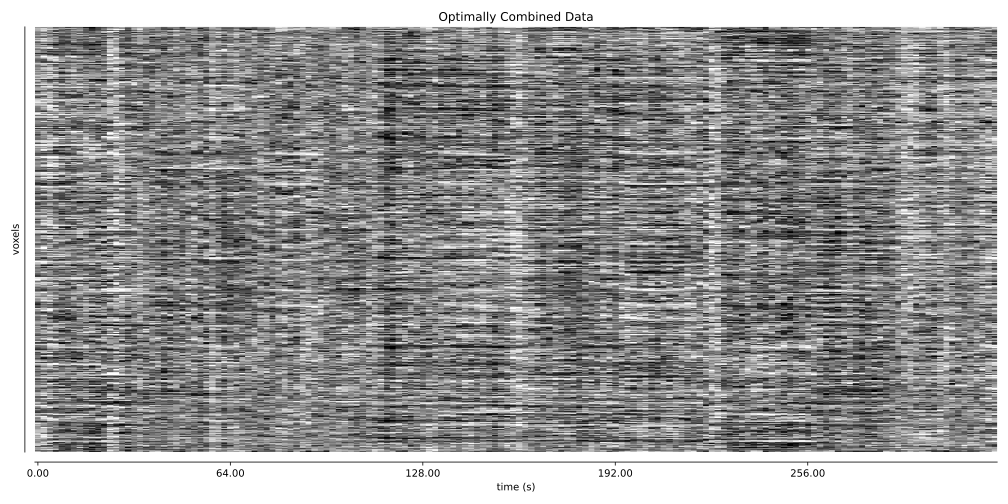

In [51]:
from IPython.display import Image
from IPython.core.display import SVG

SVG(filename='five-echo-dataset/tedana_processed/figures/carpet_optcom.svg')

### Adaptive Mask

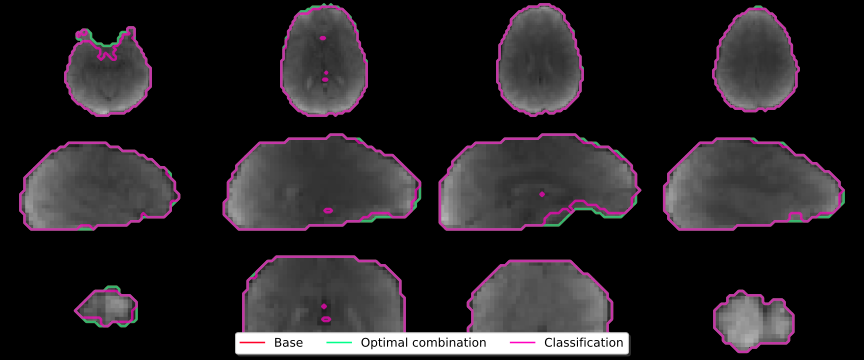

In [52]:
SVG(filename='five-echo-dataset/tedana_processed/figures/adaptive_mask.svg')

### T2*

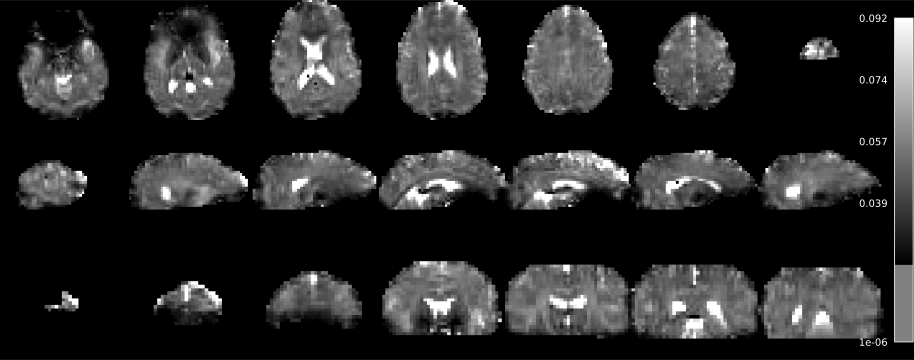

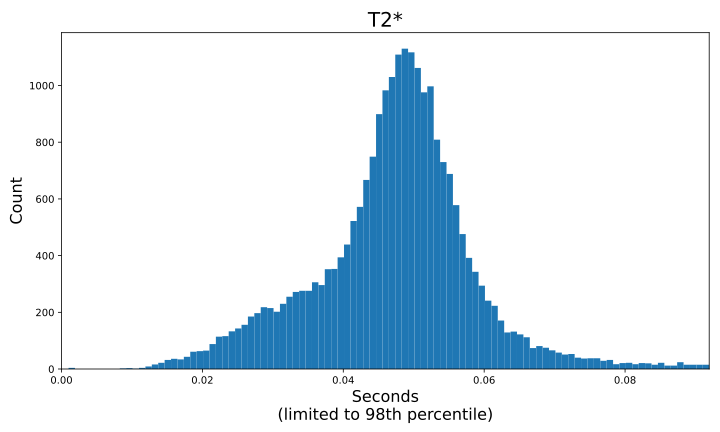

In [53]:
t2star_brain = SVG(filename='five-echo-dataset/tedana_processed/figures/t2star_brain.svg')
t2star_histogram = SVG(filename='five-echo-dataset/tedana_processed/figures/t2star_histogram.svg')

display(t2star_brain, t2star_histogram)

### S0

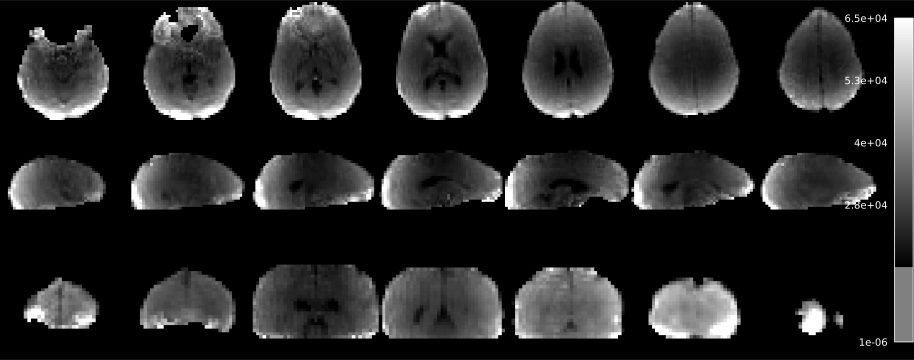

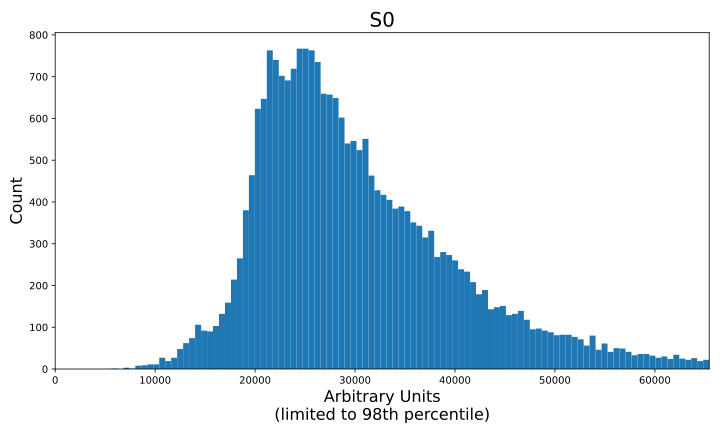

In [54]:
s0_brain = SVG(filename='five-echo-dataset/tedana_processed/figures/s0_brain.svg')
s0_histogram = SVG(filename='five-echo-dataset/tedana_processed/figures/s0_histogram.svg')

display(s0_brain, s0_histogram)

### T2* and S0 model fit (RMSE). (Scaled between 2nd and 98th percentiles)

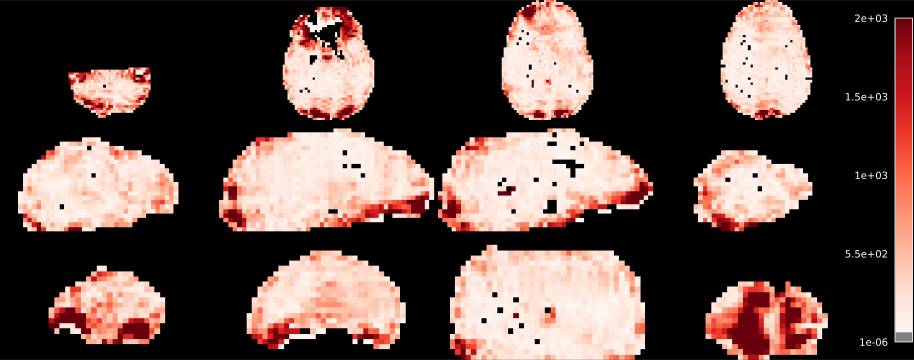

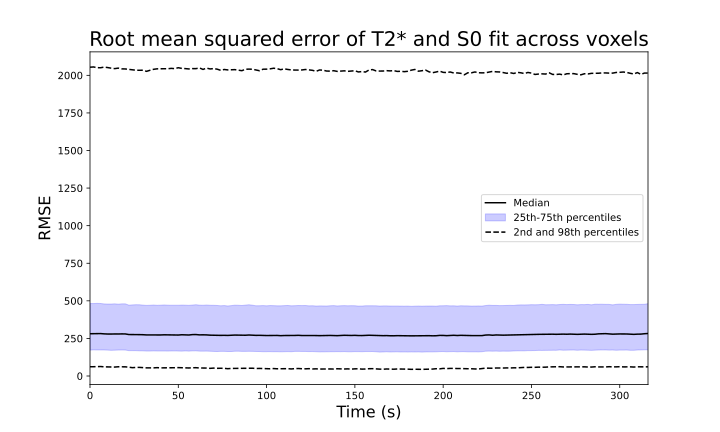

In [55]:
rmse_brain = SVG(filename='five-echo-dataset/tedana_processed/figures/rmse_brain.svg')
rmse_timeseries = SVG(filename='five-echo-dataset/tedana_processed/figures/rmse_timeseries.svg')

display(rmse_brain, rmse_timeseries)

### Time series generation using AFNI commands

In [23]:
%%bash
# A rough CSF mask for demonstration purposes
# Segment the CSF, erode by 1 voxel, #
# and retain voxels containing 75% of the CSF mask when downsampled to EPI space
cd five-echo-dataset

3dSeg -anat SBJ01_Anatomy.nii.gz -mask AUTO \
    -classes 'CSF ; GM ; WM'  \
    -bias_classes 'GM ; WM' \
    -bias_fwhm 25 -mixfrac UNI -main_N 5 \
    -blur_meth BFT
3dcalc -a ./Segsy/Classes+tlrc -expr 'equals(a, 1)' -prefix CSF_anatresolution.nii.gz
3dmask_tool -input CSF_anatresolution.nii.gz \
    -prefix CSF_eroded.nii.gz \
    -dilate_result -1 -fill_holes 
3dfractionize -template p06.SBJ01_S09_Task11_e3.sm.nii.gz \
    -prefix CSF_mask.nii.gz \
    -input CSF_eroded.nii.gz \
    -clip 0.75

# make CSF principal components
3dpc -mask CSF_mask.nii.gz -pcsave 3  \
    -prefix CSF_timeseries \
    ./tedana_processed/desc-optcom_bold.nii.gz

# Combine all external regressors into a single file
external_regress_header="mot_x\tmot_y\tmot_z\tmot_pitch\tmot_roll\tmot_yaw\t"\
"mot_dx\tmot_dy\tmot_dz\tmot_dpitch\tmot_droll\tmot_dyaw\tcsf1\tcsf2\tcsf3\t"\
"signal_checkerboard"

1dcat -tsvout \
    SBJ01_S09_Task11_e2_Motion.demean.1D \
    SBJ01_S09_Task11_e2_Motion.demean.der.1D \
    CSF_timeseries0?.1D \
    block_task_response.1D \
    > tmp.tsv

# Convert spaces to tabs and skip the header line from 1dcat
tail -n +2 tmp.tsv | tr ' ' '\t' > tmp_clean.tsv

# Add header
(echo -e "$external_regress_header"; cat tmp_clean.tsv) > external_regressors.tsv

# Clean up
rm tmp.tsv tmp_clean.tsv

*+ WARNING: +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*+ WARNING: ss.cp+tlrc[0] scale to shorts mean misfit error = 38.4% -- **** Red Alert ****
 + a) Numerical precision has been lost when truncating results
       from 32-bit floating point to 16-bit integers (shorts).
 + b) Consider writing datasets out in float format.
       In most AFNI programs, use the '-float' option.
 + c) This warning is a new message, but is an old issue
       that arises when storing results in an integer format.
 + d) Don't panic! These messages likely originate in peripheral
       or unimportant voxels. They mean that you must examine your output.
       "Assess the situation and keep a calm head about you,
        because it doesn't do anybody any good to panic."
++ ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
*+ WARNING: GenPriorsOut.x+tlrc[0] scale to shorts mean misfit error = 40.0% -- ***** Purple Alert! *****
*+ WARNING: GenPriorsOut.x+tlrc[0] scale to sh


++ Compile date = Oct  1 2024 {AFNI_24.3.00:linux_ubuntu_24_64}



++ 3dcalc: AFNI version=AFNI_24.3.00 (Oct  1 2024) [64-bit]
++ Authored by: A cast of thousands
++ Output dataset ./CSF_anatresolution.nii.gz
++ no -frac option: defaulting to -union
++ processing 1 input dataset(s), NN=2...
++ padding all datasets by 0 (for dilations)
++ have 1 volumes of input to combine
++ frac 0 over 1 volumes gives min count 0
++ voxel limits: 0 clipped, 135363 survived, 11398973 were zero
++ filled 0 holes (0 voxels)
++ writing result CSF_eroded.nii.gz...
++ Output dataset ./CSF_eroded.nii.gz
++ 3dfractionize: AFNI version=AFNI_24.3.00 (Oct  1 2024) [64-bit]
++ Authored by: RW Cox
-- Writing 83 nonzero mask voxels to dataset ./CSF_mask.nii.gz
++ 3dpc: AFNI version=AFNI_24.3.00 (Oct  1 2024) [64-bit]


## Run workflow on 5 echo data using existing mixing matrix and external regressors

INFO     tedana:tedana_workflow:608 Using output directory: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed
INFO     tedana:tedana_workflow:608 Using output directory: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed
INFO     tedana:tedana_workflow:608 Using output directory: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed
INFO     tedana:tedana_workflow:627 Initializing and validating component selection tree
INFO     tedana:tedana_workflow:627 Initializing and validating component selection tree
INFO     tedana:tedana_workflow:627 Initializing and validating component selection tree
INFO     component_selector:__init__:333 Performing component selection with demo_external_regressors_motion_task_models
INFO     component_selector:__init__:333 Performing component selection with demo_external_regressors_motion_task_models
INFO     component_selector:__init__:333 Performing component sel

(160, 39)
(160, 39)
(160, 39)
(160, 39)


INFO     io:denoise_ts:613 Variance explained by decomposition: 94.68%
INFO     io:denoise_ts:613 Variance explained by decomposition: 94.68%
INFO     io:denoise_ts:613 Variance explained by decomposition: 94.68%
INFO     io:write_split_ts:700 Writing denoised time series: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed/desc-denoised_bold.nii.gz
INFO     io:write_split_ts:700 Writing denoised time series: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed/desc-denoised_bold.nii.gz
INFO     io:write_split_ts:700 Writing denoised time series: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed/desc-denoised_bold.nii.gz
INFO     io:writeresults:749 Writing full ICA coefficient feature set: /home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed/desc-ICA_components.nii.gz
INFO     io:writeresults:749 Writing full ICA coefficient feature set: /home/jovyan/Git_repositories

CPU times: user 8min 51s, sys: 6.59 s, total: 8min 58s
Wall time: 3min 40s


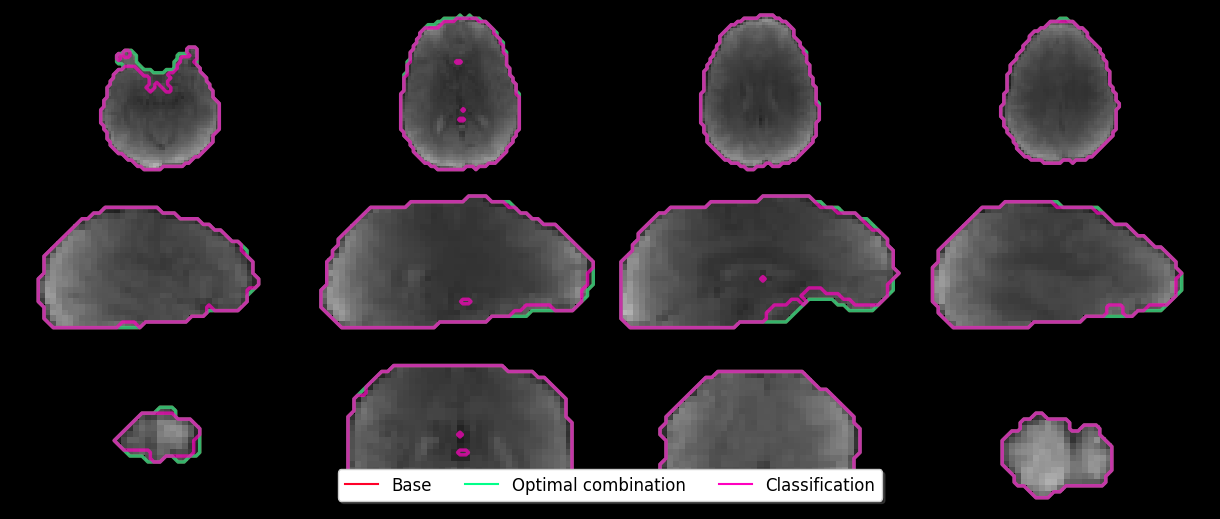

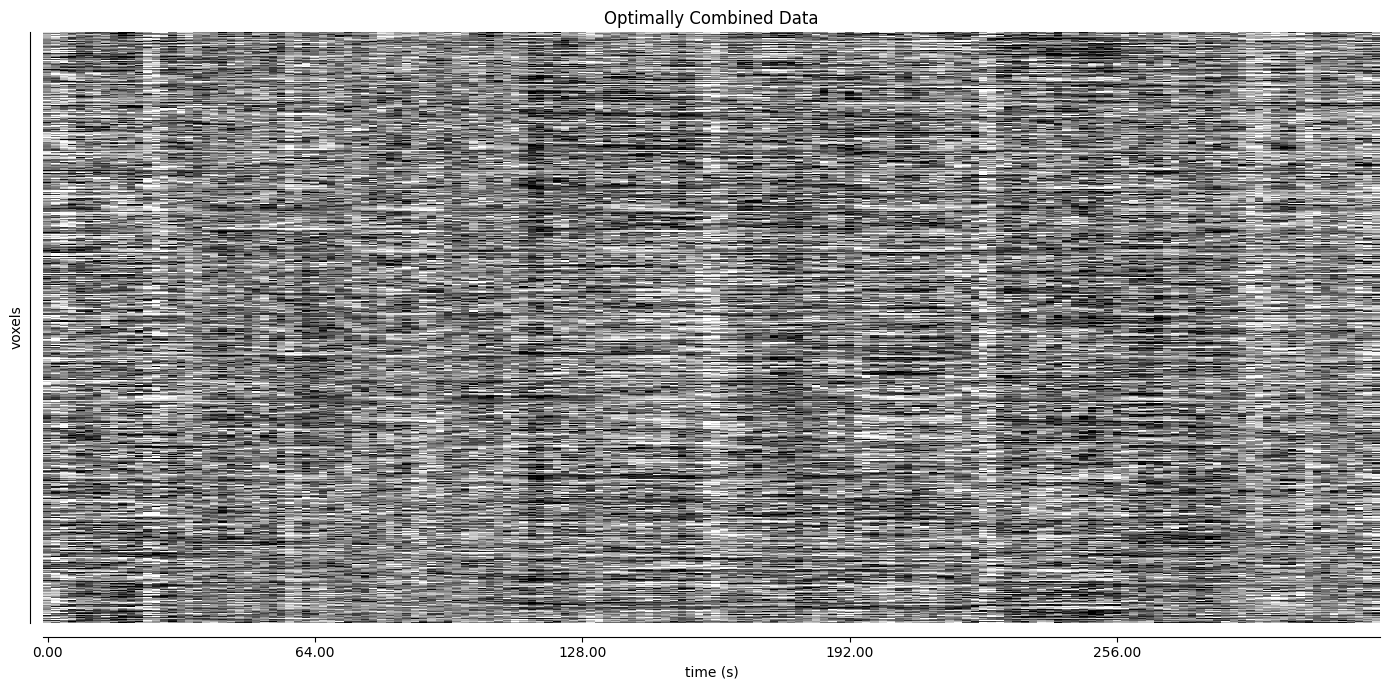

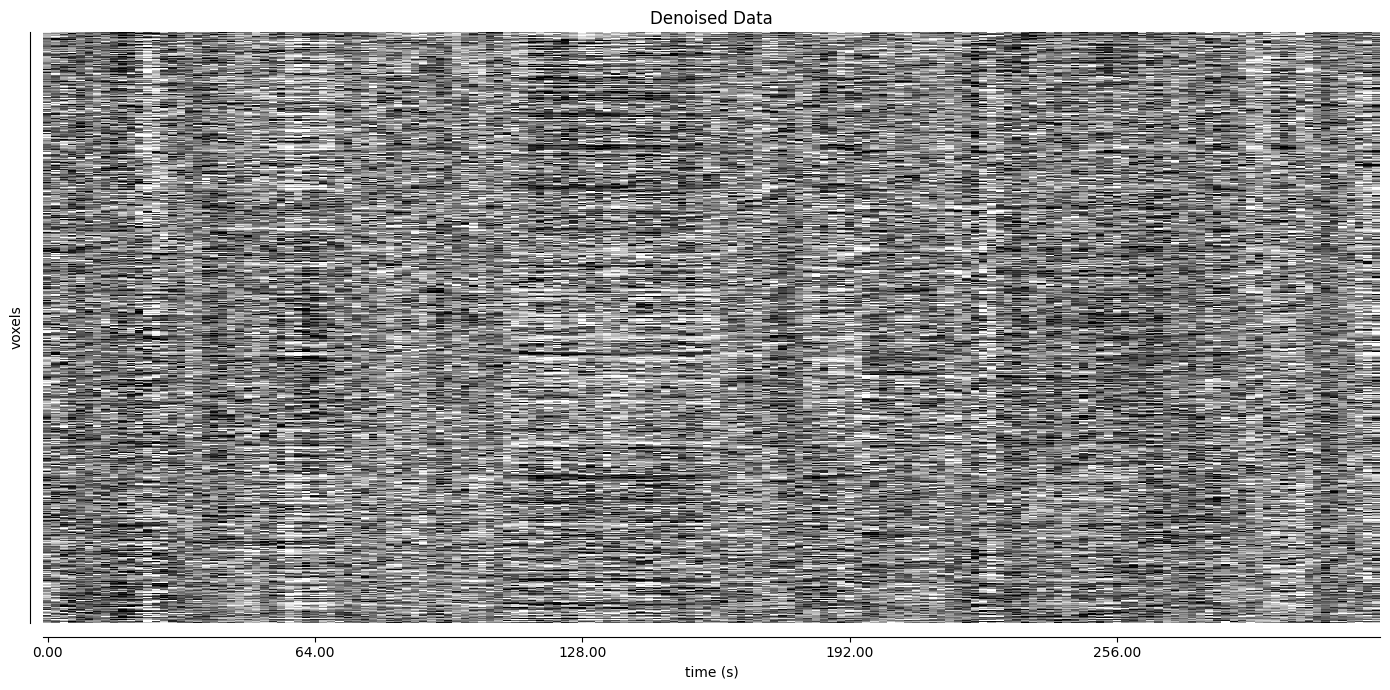

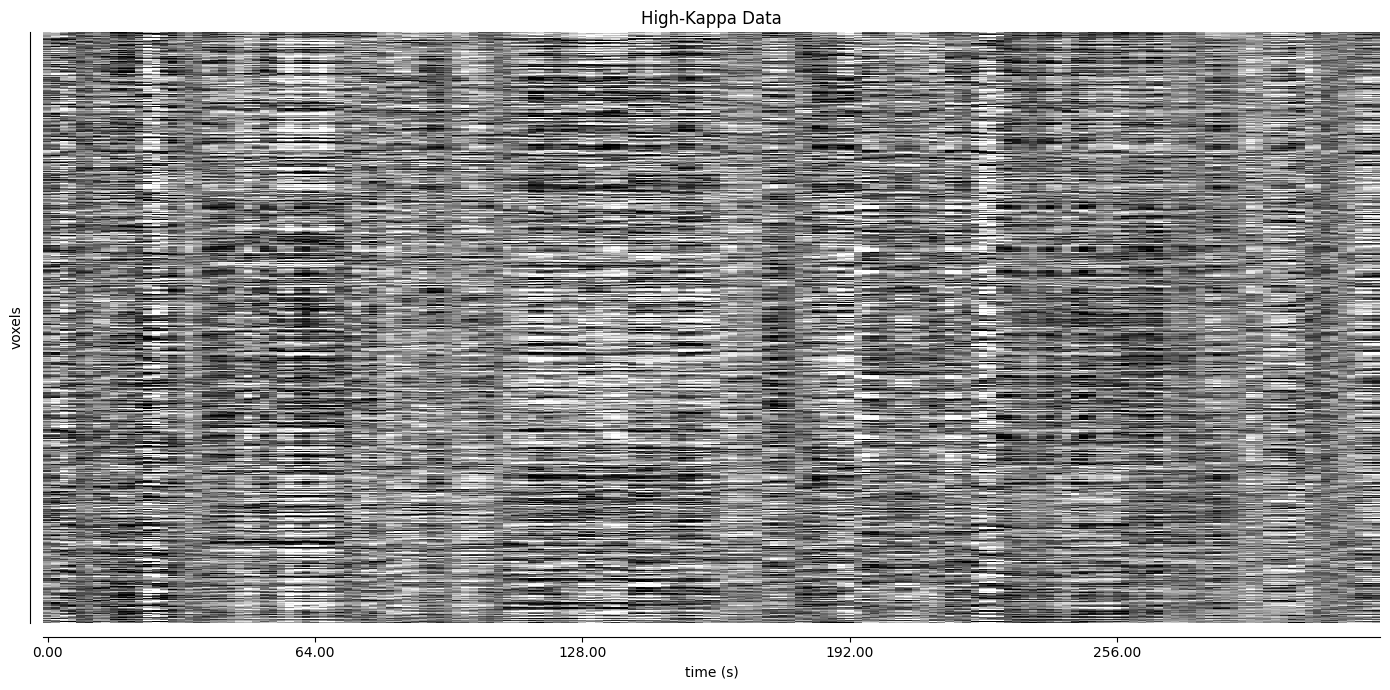

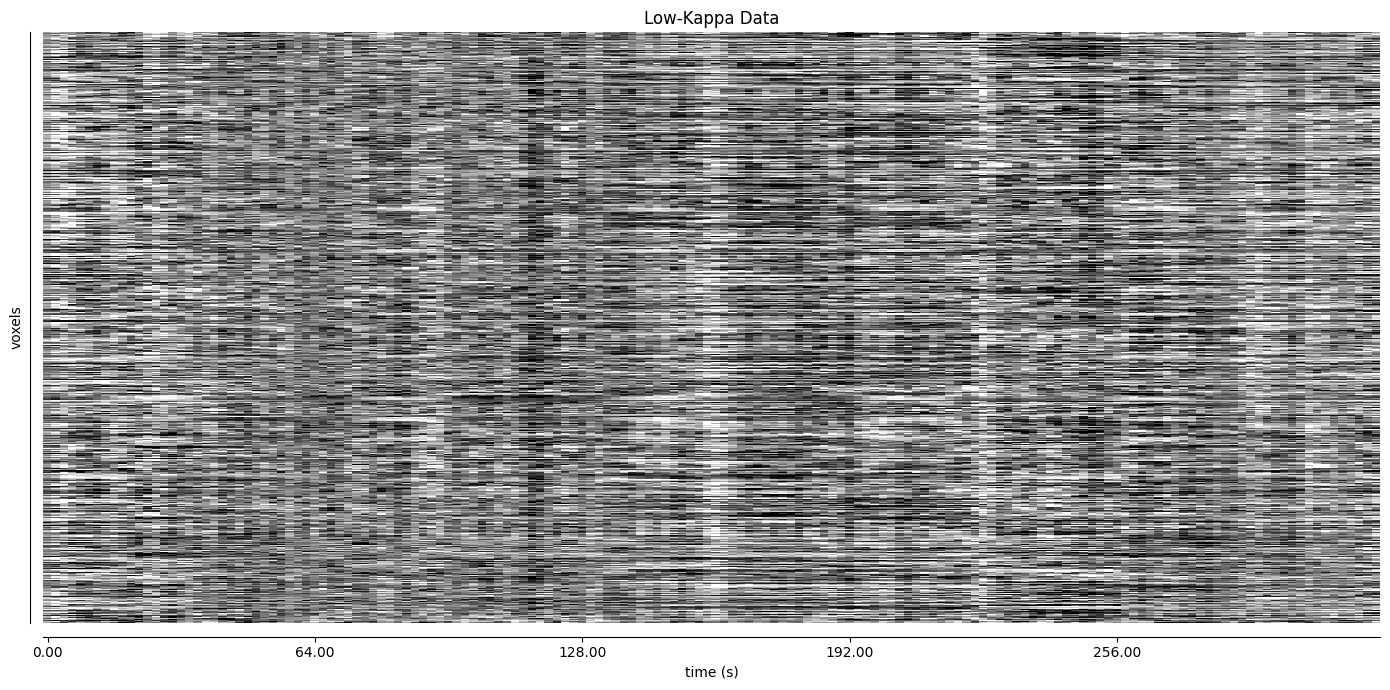

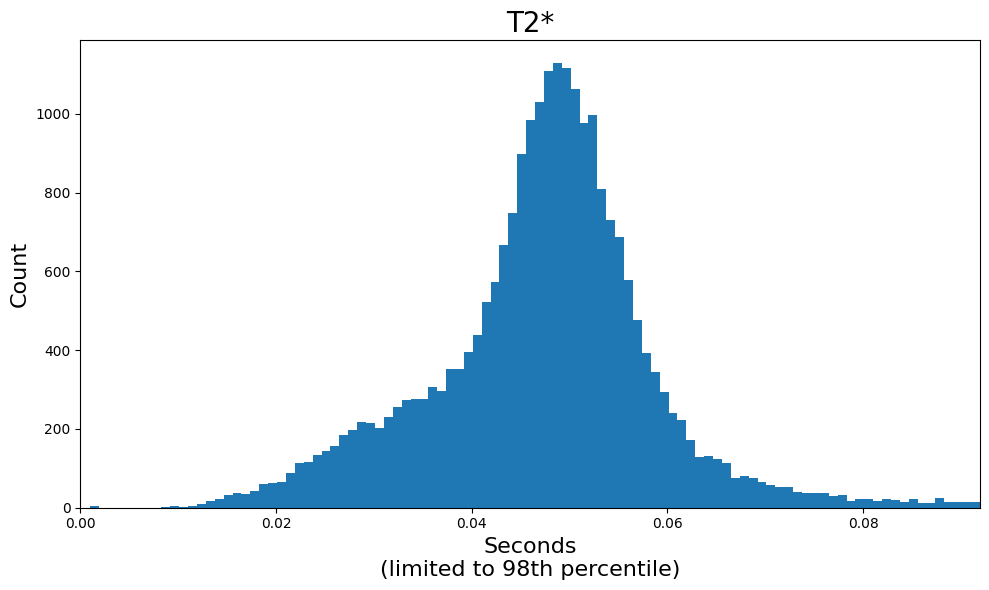

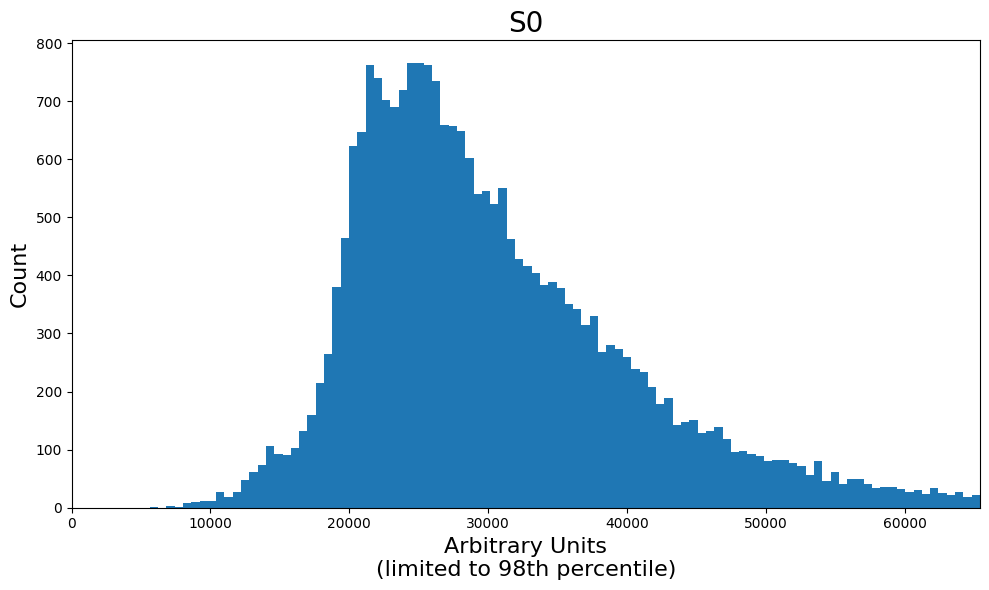

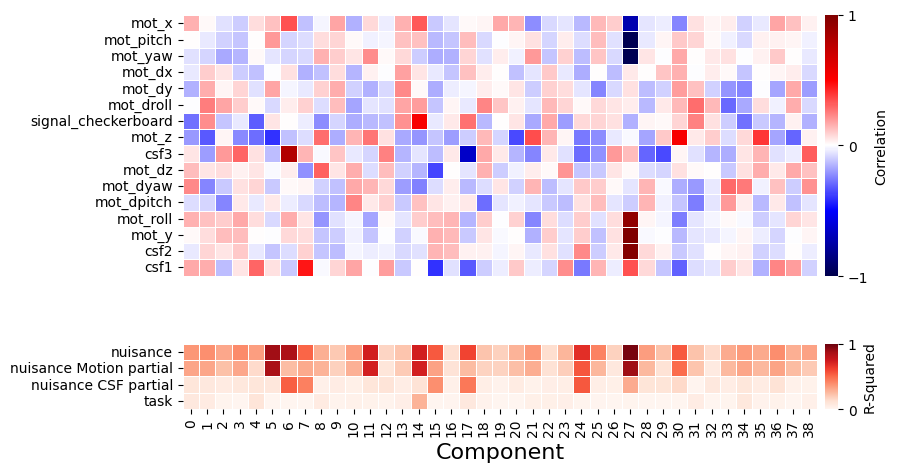

In [26]:
%%time
dset_dir5_extern_out = f"{dset_dir5}tedana_external_regress_processed"
files = sorted(glob(op.join(dset_dir5, 'p06*.nii.gz')))
tes = [15.4, 29.7, 44.0, 58.3, 72.6]
tedana_workflow(files, tes, 
    tree="demo_external_regressors_motion_task_models",
    external_regressors=op.join(dset_dir5,"external_regressors.tsv"),
    mixing_file=op.join(dset_dir5,"tedana_processed", "desc-ICA_mixing.tsv"),
    out_dir=dset_dir5_extern_out
    )

## Components of the tedana report of 5 echo data with external regressors

In [72]:
# Here is the path to the second TEDANA report
url = str(os.path.abspath(dset_dir5_extern_out + '/tedana_report.html'))
print(url)

/home/jovyan/Git_repositories/five-echo-dataset/tedana_external_regress_processed/tedana_report.html


To view this report with all figures displayed properly, right-click the file path and choose **Open in New Browser Tab**.

### Carpet plot

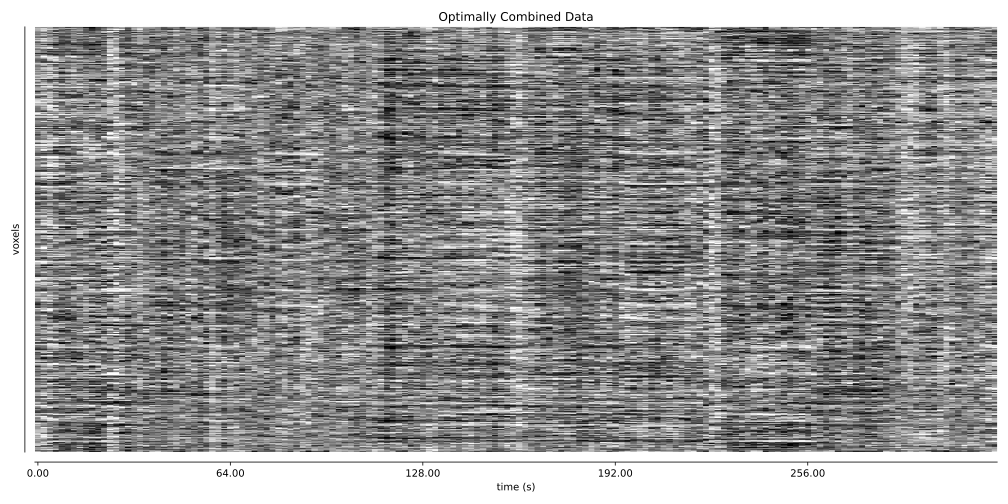

In [57]:
SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/carpet_optcom.svg')

### Adaptive Mask

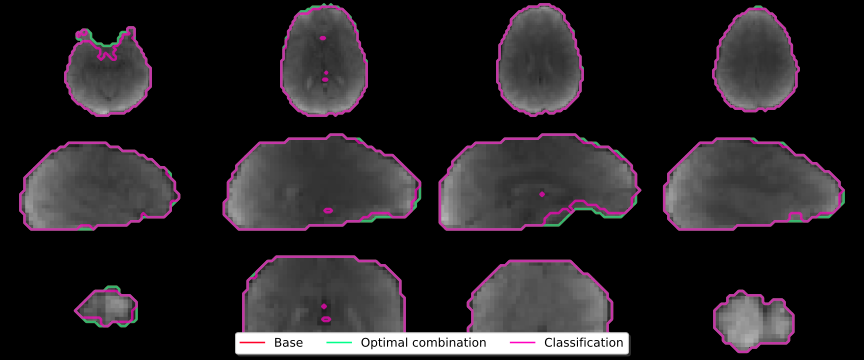

In [58]:
SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/adaptive_mask.svg')

### T2*

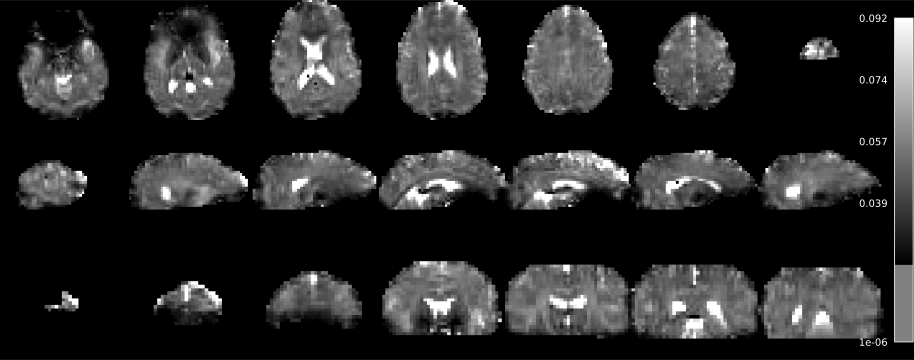

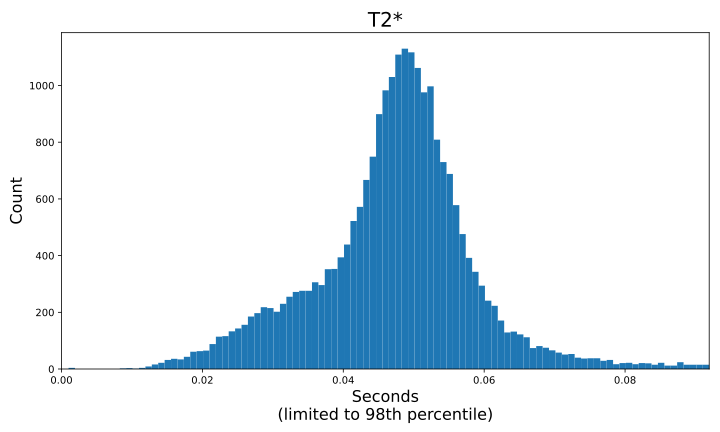

In [59]:
t2star_brain = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/t2star_brain.svg')
t2star_histogram = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/t2star_histogram.svg')

display(t2star_brain, t2star_histogram)

### S0

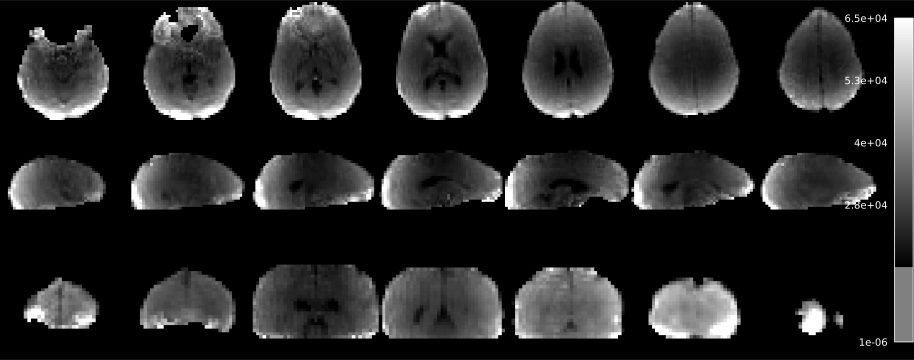

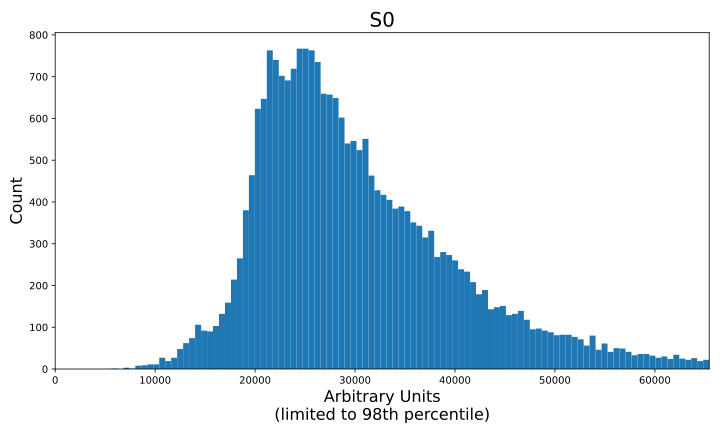

In [60]:
s0_brain = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/s0_brain.svg')
s0_histogram = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/s0_histogram.svg')

display(s0_brain, s0_histogram)

### T2* and S0 model fit (RMSE). (Scaled between 2nd and 98th percentiles)

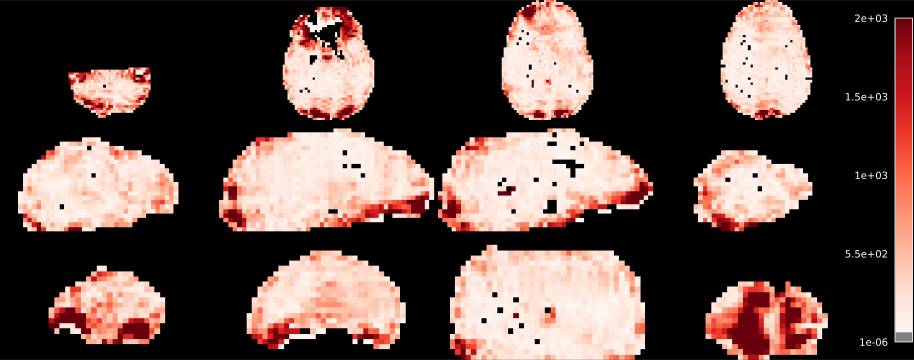

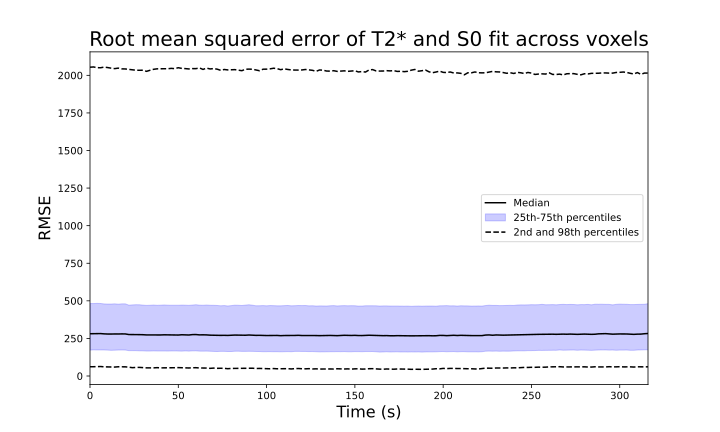

In [61]:
rmse_brain = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/rmse_brain.svg')
rmse_timeseries = SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/rmse_timeseries.svg')

display(rmse_brain, rmse_timeseries)

### External regressors

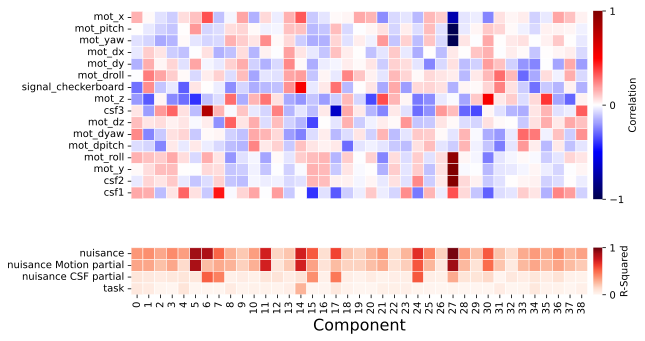

In [62]:
SVG(filename='five-echo-dataset/tedana_external_regress_processed/figures/confound_correlations.svg')